In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import spacy
import re
import nltk
import warnings
warnings.filterwarnings('ignore')

In [57]:
# Downloads for NLTK
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [58]:
data = pd.read_csv('/content/Tweets (1).csv')

In [59]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [60]:
text_data = data[['text','airline_sentiment']]

In [61]:
text_data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


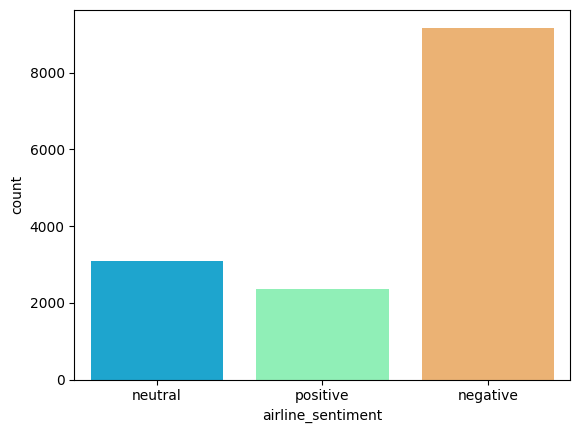

In [62]:
#lets visualize the sentiments
sns.countplot(data = text_data,x = 'airline_sentiment',palette = 'rainbow')
plt.show()

In [64]:
#lets see few tweets in text
for i in text_data['text'][:6]:
  print(i)

@VirginAmerica What @dhepburn said.
@VirginAmerica plus you've added commercials to the experience... tacky.
@VirginAmerica I didn't today... Must mean I need to take another trip!
@VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
@VirginAmerica and it's a really big bad thing about it
@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.
it's really the only bad thing about flying VA


### Noise Removal

In [65]:
#lets do some preprocessing on the text data
#coverting every text to lower case
text_data['text'] = text_data['text'].apply(lambda x : x.lower())

In [66]:
#lets remove noises like @,...
#first lets remove the @mentions from the text
clean_text = []
for i in text_data['text']:
  clean_text.append(re.sub(r'@\w+','',i))
text_data['text'] = clean_text

In [67]:
#next lets remove http links
clean_text = []
for i in text_data['text']:
  clean_text.append(re.sub(r'http\S+','',i))
text_data['text'] = clean_text

In [68]:
# next lets remove all emojis and #tage
clean_text = []
for i in text_data['text']:
  clean_text.append(re.sub(r'[^a-z\s]+','',i))
text_data['text'] = clean_text

In [69]:
text_data['text'].head()

,text
0,what said
1,plus youve added commercials to the experienc...
2,i didnt today must mean i need to take anothe...
3,its really aggressive to blast obnoxious ente...
4,and its a really big bad thing about it


In [70]:
#lets campare the original one or new one
data['text'].head()

,text
0,@VirginAmerica What @dhepburn said.
1,@VirginAmerica plus you've added commercials t...
2,@VirginAmerica I didn't today... Must mean I n...
3,@VirginAmerica it's really aggressive to blast...
4,@VirginAmerica and it's a really big bad thing...


### Tokenization

#### Lets seperate the tweets with negative sentiments

In [71]:
neg_tweets = text_data[text_data['airline_sentiment'] == 'negative']['text']
corpus_neg_tweets = ''
for i in neg_tweets:
  corpus_neg_tweets= corpus_neg_tweets+' '+i

In [73]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [74]:
le = WordNetLemmatizer()

In [75]:
stop_words = stopwords.words('english')

In [76]:
tokens_neg = [le.lemmatize(word) for word in word_tokenize(corpus_neg_tweets) if word not in stop_words]

# WordCloud

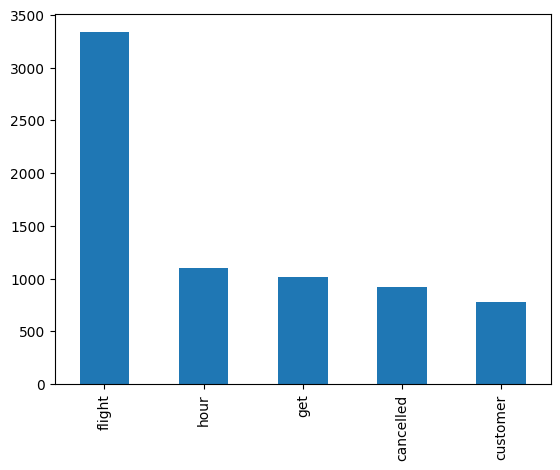

In [77]:
pd.Series(tokens_neg).value_counts().head().plot(kind = 'bar')
plt.show()

In [78]:
# word cloud
from wordcloud import WordCloud

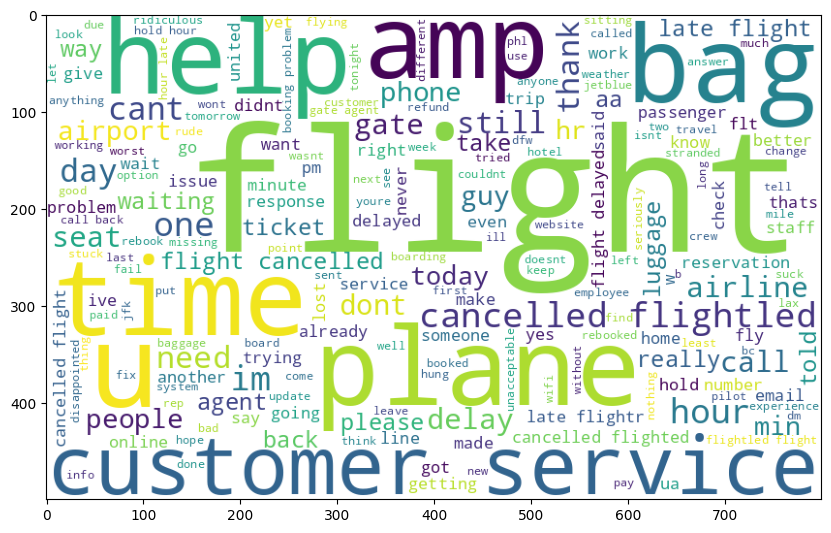

In [79]:
plt.figure(figsize = (10,14))
cloud = WordCloud(width = 800,height = 500,
                  background_color = 'white').generate(' '.join(tokens_neg))
plt.imshow(cloud)
plt.show()

###  Lets seperate the tweets with Positive sentiments

In [80]:
pos_tweets = text_data[text_data['airline_sentiment'] == 'positive']['text']
corpus_pos_tweets = ''
for i in pos_tweets:
  corpus_pos_tweets= corpus_pos_tweets+' '+i

In [82]:
le = WordNetLemmatizer()
stop_words = stopwords.words('english')
tokens_pos = [le.lemmatize(word) for word in word_tokenize(corpus_pos_tweets) if word not in stop_words]

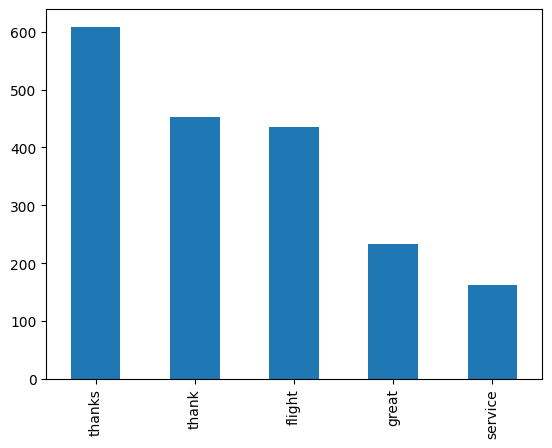

In [83]:
pd.Series(tokens_pos).value_counts().head().plot(kind = 'bar')
plt.show()

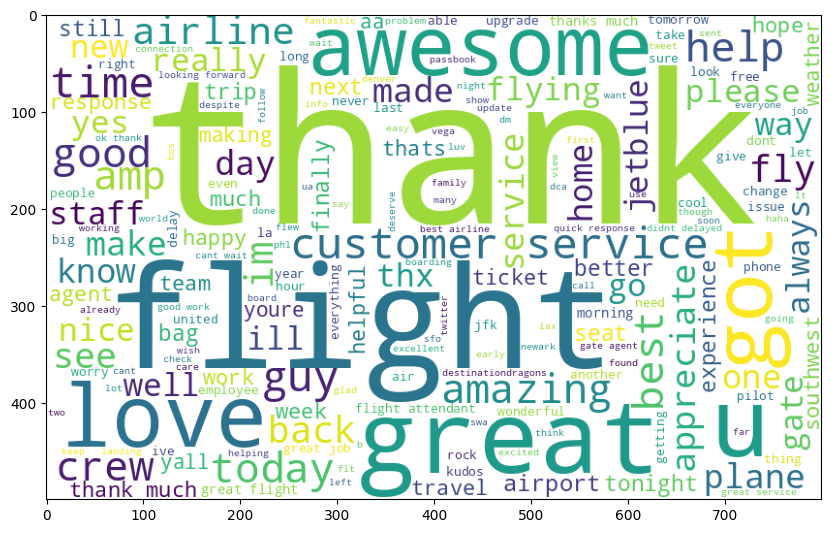

In [84]:
plt.figure(figsize = (10,14))
cloud = WordCloud(width = 800,height = 500,
                  background_color = 'white').generate(' '.join(tokens_pos))
plt.imshow(cloud)
plt.show()

###  Lets seperate the tweets with neutral sentiments

In [85]:
neutral_tweets = text_data[text_data['airline_sentiment'] == 'neutral']['text']
corpus_neutral_tweets = ''
for i in neutral_tweets:
  corpus_neutral_tweets= corpus_neutral_tweets+' '+i

In [87]:
le = WordNetLemmatizer()
stop_words = stopwords.words('english')
tokens_neutral = [le.lemmatize(word) for word in word_tokenize(corpus_neutral_tweets) if word not in stop_words]

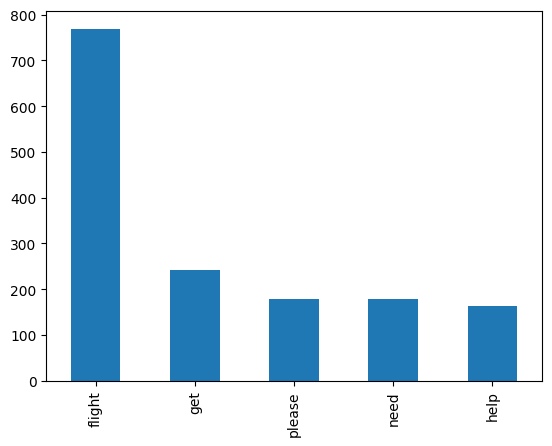

In [88]:
pd.Series(tokens_neutral).value_counts().head().plot(kind = 'bar')
plt.show()

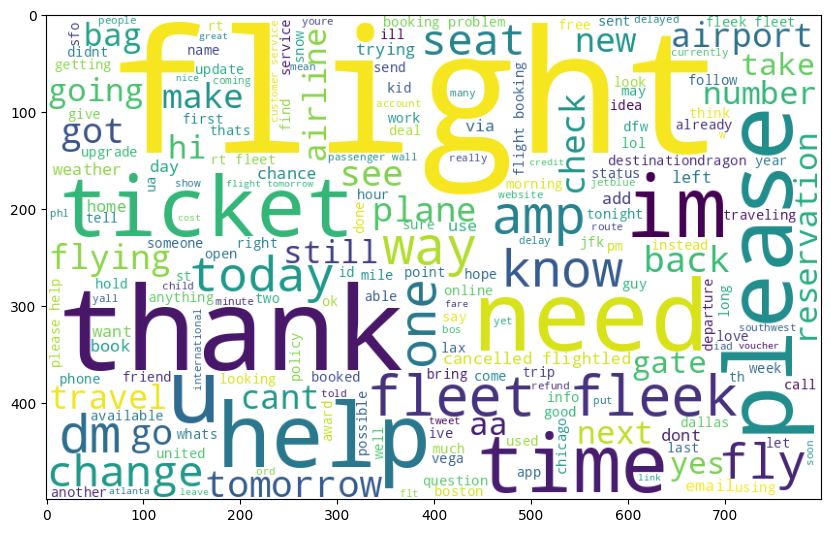

In [89]:
plt.figure(figsize = (10,14))
cloud = WordCloud(width = 800,height = 500,
                  background_color = 'white').generate(' '.join(tokens_neutral))
plt.imshow(cloud)
plt.show()

### Vectorization

In [90]:
text_data

,text,airline_sentiment
0,what said,neutral
1,plus youve added commercials to the experienc...,positive
2,i didnt today must mean i need to take anothe...,neutral
3,its really aggressive to blast obnoxious ente...,negative
4,and its a really big bad thing about it,negative
...,...,...
14635,thank you we got on a different flight to chi...,positive
14636,leaving over minutes late flight no warnings...,negative
14637,please bring american airlines to blackberry,neutral
14638,you have my money you change my flight and do...,negative


In [91]:
# Vectorize using Bow
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [92]:
from nltk.stem import SnowballStemmer

In [93]:
sb = SnowballStemmer('english')

In [94]:
def text_preprocessing(text):
  clean = ' '.join([le.lemmatize(sb.stem(t),pos='v') for t in word_tokenize(text) if t not in stop_words])
  return clean

In [95]:
text_data['text'] = text_data['text'].apply(text_preprocessing)

In [115]:
text_data

,text,airline_sentiment
0,say,neutral
1,plus youv ad commerci experi tacki,positive
2,didnt today must mean need take anoth trip,neutral
3,realli aggress blast obnoxi entertain guest fa...,negative
4,realli big bad thing,negative
...,...,...
14635,thank get differ flight chicago,positive
14636,leav minut late flight warn communic minut lat...,negative
14637,pleas bring american airlin blackberri,neutral
14638,money chang flight dont answer phone suggest m...,negative


In [120]:
#lets split these tweets in train and test
from sklearn.model_selection import train_test_split

In [135]:
x = text_data[['text']]
y = text_data['airline_sentiment'].map({'positive':2,'negative':0,'neutral':1})
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify =y,train_size = 0.8,random_state = 42)

In [122]:
vectorizer  = CountVectorizer()

In [125]:
bow_mat = vectorizer.fit_transform(x_train['text']).toarray()
x_train_v = pd.DataFrame(bow_mat,columns = vectorizer.get_feature_names_out())
x_train_v

,aa,aaaand,aaadvantag,aaalwaysl,aaba,aacom,aadavantag,aadelay,aadfw,aadv,...,zfv,zigzag,zipper,zombi,zone,zoom,zrh,zuke,zurich,zurichnew
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11707,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11708,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11709,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11710,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
# vectors for test
bow_mat = vectorizer.transform(x_test['text']).toarray()
x_test_v = pd.DataFrame(bow_mat,columns = vectorizer.get_feature_names_out())
x_test_v


,aa,aaaand,aaadvantag,aaalwaysl,aaba,aacom,aadavantag,aadelay,aadfw,aadv,...,zfv,zigzag,zipper,zombi,zone,zoom,zrh,zuke,zurich,zurichnew
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2924,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2925,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2926,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Modelling

#### base model


In [153]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [155]:
model_rf = RandomForestClassifier()

In [156]:
model_rf.fit(x_train_v,y_train)

RandomForestClassifier()

In [157]:
pred = model_rf.predict(x_test_v)

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      1835
           1       0.62      0.50      0.56       620
           2       0.75      0.56      0.64       473

    accuracy                           0.76      2928
   macro avg       0.72      0.65      0.68      2928
weighted avg       0.75      0.76      0.75      2928



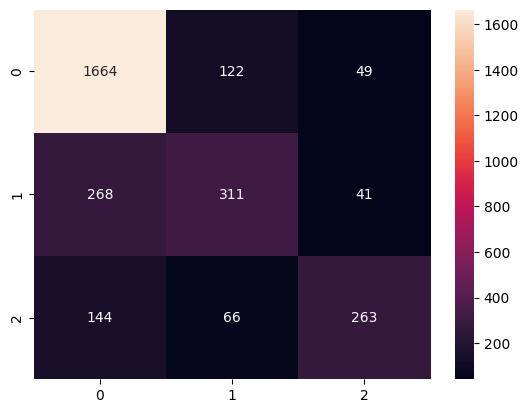

In [158]:
print(classification_report(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot = True,fmt = 'g')
plt.show()

#### XGB model

In [159]:
xgb = XGBClassifier(n_estimators = 100,max_depth = 10)

In [136]:
xgb.fit(x_train_v,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [137]:
pred = xgb.predict(x_test_v)

In [139]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1835
           1       0.63      0.55      0.59       620
           2       0.76      0.61      0.68       473

    accuracy                           0.78      2928
   macro avg       0.74      0.69      0.71      2928
weighted avg       0.77      0.78      0.77      2928



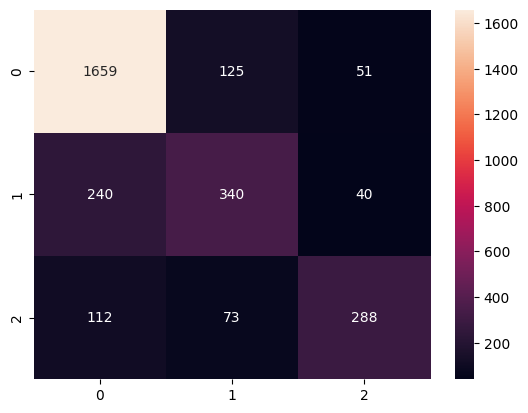

In [145]:
sns.heatmap(confusion_matrix(y_test,pred),annot = True,fmt = 'g')
plt.show()